### 1. Poisson Distribution

In this notebook we will discuss the poisson distribution


In [51]:
%matplotlib inline

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


def plot(y_func, x_axis, y_axis, title, x_start=0.0, x_end=1.0, ):
    x = np.linspace(x_start,x_end, num=200, endpoint=True)
    y = y_func(x)
    fig, ax = plt.subplots()
    ax.set(xlabel=x_axis, ylabel=y_axis, title=title)
    ax.plot(x, y)

##### 1.1 Problem Scenario

We are helping to optimize an e-commerce site sales and create estimations about the number of orders arriving in an hour? 

We decided to create a random variable X where:

$$ X = \text{# of orders created in one hour} $$

#### Observe and record the average for 1 hour

We monitor the orders for some an hour and get the average number of orders .

$$ E(X) = \lambda = 35.5 \text{ orders} $$ 

#### Assumptions

- We are assuming that all hours is similar in respect of number of orders.

- We also, assume that the likelihood of receiving an order within any particular minute is constant.

  Ex: Average order at minute '1' is very close to orders at minute 'm' for m<>1.
  
- Number of orders on hour 'h' is independent to the number of orders on hour h+1
  

#### Modeling using the binomial distribution

Let's try to model $\lambda$ using the binomial distribution.

Each experiment is the event of receiving an order at a partibular minute.

$$E(X) = \lambda = \text{Number of trials} * p(Success) $$

We know that:

$$ \text{Number of trials in sixty minutes (n)} = 60 $$

$$ p(Success) = \frac{\lambda}{n} = \frac{\lambda}{60} $$


The probability that the number of orders in one hour is k is defined by:

$$ p(X = k) = \binom{60}{k} (\frac{\lambda}{60})^k (1 - \frac{\lambda}{60})^{60-k}
$$

This seems to be a good estimate, but...

__What if two orders arive at the same minute__?

Our intuition would make us to divide the periods in seconds.

__Then the formula would be:__

$$ p(X = k) \approx \binom{3600}{k} (\frac{\lambda}{3600})^k (1 - \frac{\lambda}{3600})^{3600-k}
$$

We are getting close, but there is still the possibility of having two orders arriving at the same second.

__Out general formulat is:__

$$ p(X = k) \approx \binom{N}{k} (\frac{\lambda}{N})^k (1 - \frac{\lambda}{N})^{N-k}
$$

To be precise we want to calculate the limit when the number of periods 'N' is very large, making the period very small.

$$ p(X = k) = \lim_{n \to \infty} \binom{n}{k} (\frac{\lambda}{n})^k (1 - \frac{\lambda}{n})^{n-k} $$

__Note:__

Remembering from the previous sessions...

$$ \frac{x!}{(x-k)!} = (x) . (x-1) ... (x-k+1) $$

An example where $ x = 10$ and $k = 4 $:

$$ \frac{10!}{(10-4)!} = (x) . (x-1) ... (10-4+1) = 10 . 9 . 8 . 7 = 5040 $$

The expession above has k elements.

__Back to our problem...__

$$ p(X = k) = \lim_{n \to \infty} \binom{n}{k} (\frac{\lambda}{n})^k (1 - \frac{\lambda}{n})^{n-k} $$

$$ p(X = k) = \lim_{n \to \infty} \frac{n!}{(n-k)!k!} (\frac{\lambda^k}{n^k}) (1 - \frac{\lambda}{n})^{n}(1 - \frac{\lambda}{n})^{-k} $$

$$ p(X = k) = \lim_{n \to \infty} \frac{(x) * (x-1) ... (x-k+1)}{k!} (\frac{\lambda^k}{n^k}) (1 - \frac{\lambda}{n})^{n}(1 - \frac{\lambda}{n})^{-k} $$

Exchange the denominators of first and second terms.

$$ p(X = k) = \lim_{n \to \infty} \frac{(x) * (x-1) ... (x-k+1)}{n^k} (\frac{\lambda^k}{k!}) (1 - \frac{\lambda}{n})^{n}(1 - \frac{\lambda}{n})^{-k} $$

__Resolving each part.__

$$ p(X = k) = \lim_{n \to \infty} A * B * C * D = $$

Where 
   $$ A = \frac{(x) * (x-1) ... (x-k+1)}{n^k} $$ and
   
   $$ B = (\frac{\lambda^k}{k!}) $$ and 

   $$ C = (1 - \frac{\lambda}{n})^{n}$$ and
   
   $$ D = (1 - \frac{\lambda}{n})^{-k}$$

__The limit of a multiplication is the multiplication of the limits__

$$ \lim_{n \to C} f1(x) * f2(x) = \lim_{n \to C} f1(x) *  \lim_{n \to C} f2(x)$$

So we separate each limit...

$$ p(X = k) = \lim_{x \to \infty} A * \lim_{n \to \infty} B * \lim_{n \to \infty} C * \lim_{n \to \infty} D $$

__Now solving each term indenpendently__

__1. Solving A__

$$ \lim_{n \to \infty} A = \frac{(n) * (n-1) ... (n-k+1)}{n^k} $$

When 'n' approaches infinity the higher order term dominate

$$ \lim_{n \to \infty} A = \frac{(1 . n^k) (c_{2} . n^{k-1}) ... (c_{k} . n^1)}{n^k} = 1 $$

$$ \lim_{n \to \infty} A = 1 $$

***

__2. Solving B__

Since B is not a function of 'n', the limit is the value.

$$ \lim_{n \to \infty} B = \lim_{n \to \infty} \frac{\lambda^k}{k!} = \frac{\lambda^k}{k!} $$

***

__3. Solving C__

__Note:__ Before solving C we should remember that!


$$ \lim_{n \to \infty}(1 + \frac{c}{n})^{n} = e^{c}
$$ 

$ x = (n * c) $ that gives $ \frac{c}{x} = \frac{1}{n} $

$$ \lim_{x \to \infty} n = \lim_{x \to \infty} \frac{x}{c}  = \infty $$

Replacing the limits to use 'n'

$$ \lim_{n \to \infty} (1 + \frac{c}{x})^{x} $$

We know that $ x = n * c $ and $ \frac{c}{x} = \frac{1}{n} $

Then 
$$ \lim_{n \to \infty} (1 + \frac{c}{x})^{x} = \lim_{n \to \infty} (1 + \frac{1}{n})^{n*c}$$

$$ = \lim_{n \to \infty} ((1 + \frac{1}{n})^{n})^{c} $$

From the definition of '$e$'

$$ e =  \lim_{x \to \infty} (1 + \frac{1}{x})^{x} $$

Then 

$$ (\lim_{n \to \infty} (1 + \frac{1}{n})^{n})^{c} = e^{c} $$


_If_
$$ \lim_{n \to \infty}(1 + \frac{c}{n})^{n} = e^{c} $$

__then__
$$ \lim_{n \to \infty} C = \lim_{n \to \infty} (1 - \frac{\lambda}{n})^{n}$$ 

making $ c = -\lambda$, gives

$$ \lim_{n \to \infty} C = e^{-\lambda} $$

***

__4. Solving D__

$$ \lim_{n \to \infty} D = (1 - \frac{\lambda}{n})^{-k} $$

Notice that

$$ \lim_{n \to \infty} \frac{\lambda}{n} = 0 $$

So

$$ \lim_{n \to \infty} D = (1 - 0)^{-k} = 1 $$


***

__Putting everything back together__

We have:

$$ p(X = k) = \lim_{n \to \infty} A * \lim_{n \to \infty} B * \lim_{n \to \infty} C * \lim_{n \to \infty} D $$

$$ p(X = k) = 1 * \frac{\lambda^k}{k!} * e^{-\lambda} * 1 $$

$$ p(X = k) = \frac{\lambda^k}{k!} e^{-\lambda}  $$

__We conclude that:__

$$ \lim_{n \to \infty} \binom{n}{k} (\frac{\lambda}{n})^k (1 - \frac{\lambda}{n})^{n-k} =  \frac{\lambda^k}{k!} e^{-\lambda} $$


$$ P(X = k) =  \frac{\lambda^k}{k!} e^{-\lambda} $$


Now back to our original e-commerce problem:

Whats the probability of receiving 40 orders in one hour?

We need to find $P(X = 40)$ and $ \lambda=35.5$ 


From the formula:

$$ P(X = 40) =  \frac{35.5^{40}}{40!} e^{-35.5} = 4.79\% $$

In [52]:
from math import factorial, exp

In [53]:
def poisson(x, value_lambda):
    return ( (value_lambda ** x)/factorial(x)) * exp(-value_lambda)

def report_poisson_ecom(x, value_lambda=35.5):
    print('P(X={0}) = {1:.2f}%'.format(x, ecommerce_p(x) * 100))

In [57]:
report_poisson_ecom(40)
report_poisson_ecom(35)
report_poisson_ecom(36)

P(X=40) = 4.79%
P(X=35) = 6.70%
P(X=36) = 6.61%


In [58]:
x = list(range(5, 65))
y = [poisson(v, 33.5) for v in x]

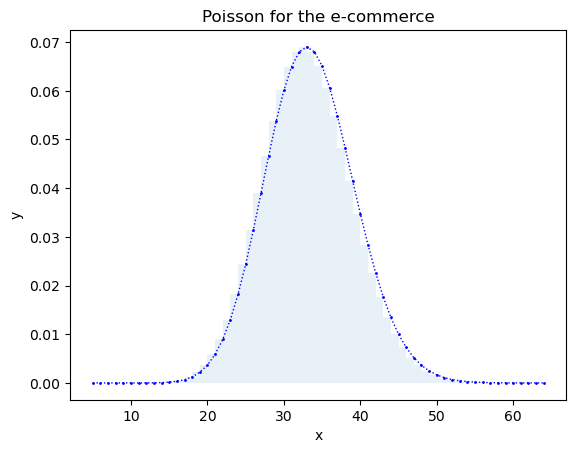

In [59]:
import matplotlib.pyplot as plt

plt.plot(x, y, color='blue', marker='.', linestyle='dotted', linewidth=1, markersize=2)
plt.xlabel('x') 
plt.ylabel('y') 
plt.fill_between(x, y, step="pre", alpha=0.1)

plt.title("Poisson for the e-commerce")
  
plt.show()

Notice that the highest point close to our empirical average $\lambda = 35.5$